# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [83]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore")

Load feature names.

In [84]:
feature_names = []
feature_junk = []
feature_index = []

with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)
        feature_junk.append(junk)
        feature_index.append(index)

print('Loaded feature names:', len(feature_names))
print(feature_names)
#print(feature_junk)
#print(feature_index)

Loaded feature names: 126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-colo

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [85]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

print(train_data)

(7000, 126) (1124, 126)
[[ 0.  0.  1. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

In [87]:
#def P1():
### STUDENT START ###
n_comp = 125
pca_mod = PCA(n_components = n_comp)
# Run Principal Components Analysis on the data.
pca_mod.fit(train_data, train_labels)

# Display what fraction of the total variance in the training data is explained 
# by the first k principal components, for k in [1, 50].
header = ["Principal Component", "Fraction of Variance explained"]
row_format ="{:>25}" * (len(header))
print(row_format.format(*header))
print('     --------------------------------------------------')
list1 = [0, 0]
fraction = 0.0
for i in range(0, 50):
    fraction += pca_mod.explained_variance_ratio_[i]
    list1[0] = i;
    list1[1] = np.round(fraction, 4)
    print(row_format.format(*list1))

### STUDENT END ###

#P1()

      Principal ComponentFraction of Variance explained
     --------------------------------------------------
                        0                    0.164
                        1                   0.2973
                        2                    0.399
                        3                   0.4696
                        4                   0.5083
                        5                   0.5451
                        6                   0.5764
                        7                   0.6037
                        8                   0.6299
                        9                   0.6522
                       10                   0.6727
                       11                   0.6914
                       12                   0.7087
                       13                   0.7256
                       14                   0.7408
                       15                   0.7558
                       16                   0.7701
                     

explained variance ratio (first two components): [ 0.16404331  0.13323479]


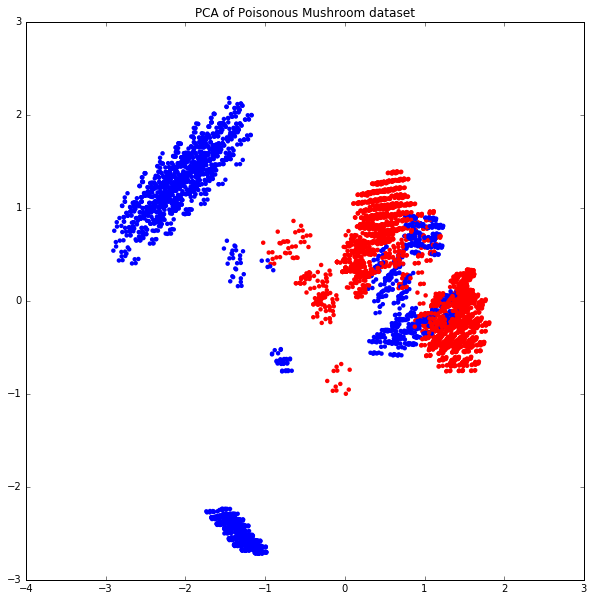

In [89]:
#def P2():
### STUDENT START ###
X = train_data
y = train_labels

#Project the training data down to 2 dimensions 
n_comp = 2
pca_mod = PCA(n_components = n_comp)
target_names = ["Non-Poisonous", "Poisonous"]
X_r = pca_mod.fit(train_data, train_labels).transform(train_data)


# Percentage of variance explained for each component
print('explained variance ratio (first two components): %s'
      % str(pca_mod.explained_variance_ratio_))
color = np.where(train_labels == 1, 'blue', 'red')
# Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red
targetname = np.where(train_labels == 1, "Poisonous", "Non-Poisonous")
plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=color, label=targetname, s = 20, edgecolor='')
   
plt.title('PCA of Poisonous Mushroom dataset')

### STUDENT END ###

#P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

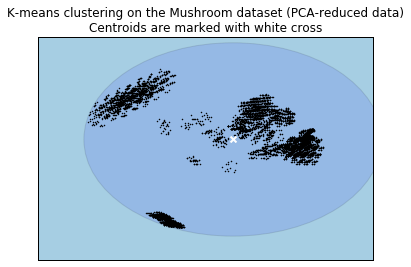

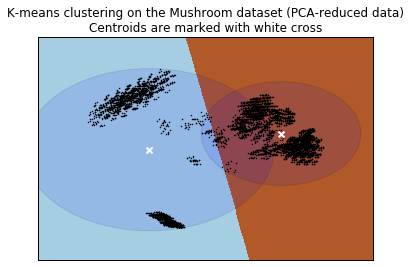

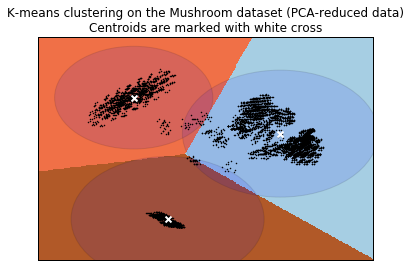

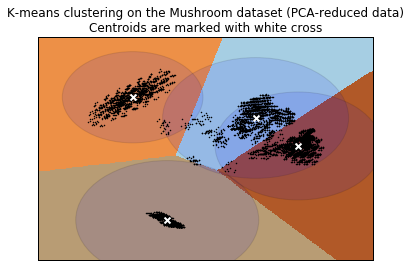

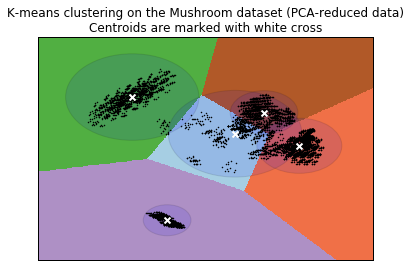

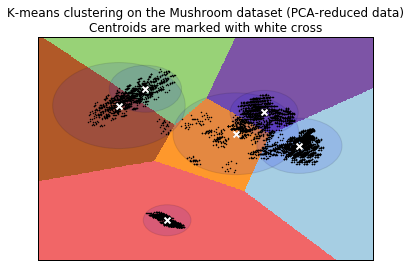

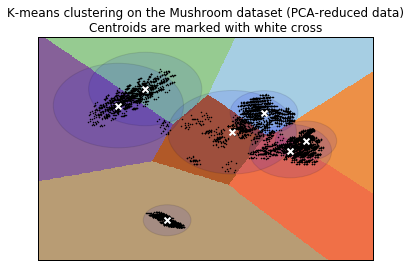

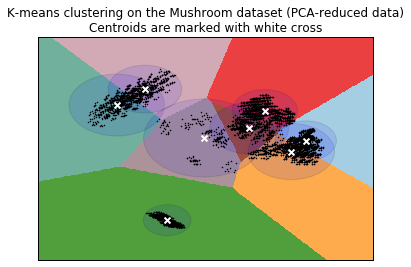

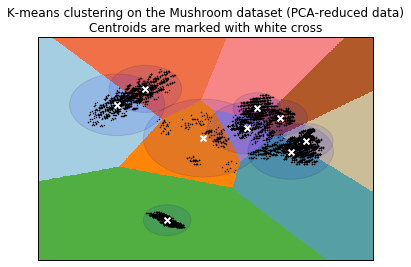

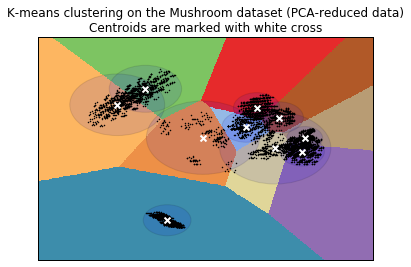

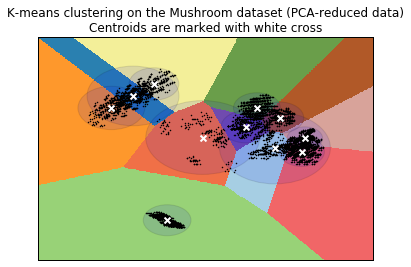

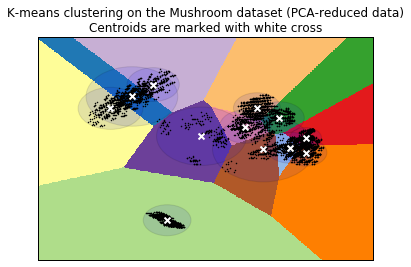

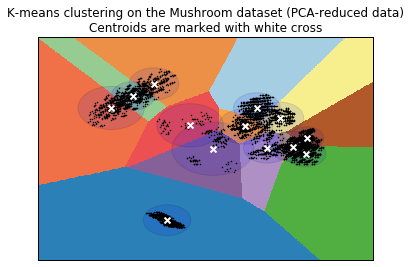

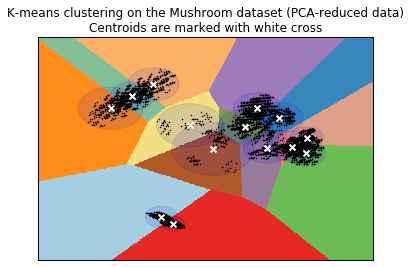

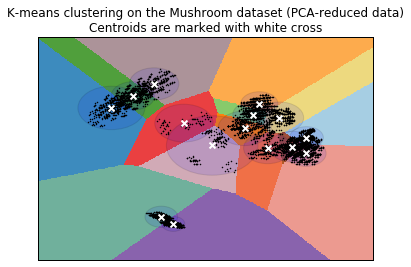

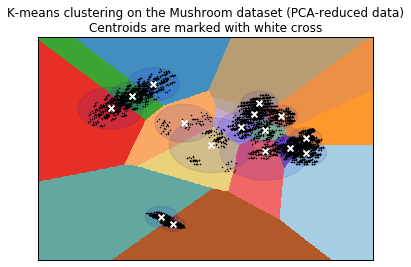

In [91]:
def P3(X_r, num):
    for i in range(1, num+1):
        clf = KMeans(n_clusters=i)
        predicted = clf.fit(X_r)
        
        # Plotting code is from 
        # http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#example-cluster-plot-kmeans-digits-py
        # Step size of the mesh. Decrease to increase the quality of the VQ.
        h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

        # Plot the decision boundary. For that, we will assign a color to each
        x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
        y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Obtain labels for each point in mesh. Use last trained model.
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

        plt.plot(X_r[:, 0], X_r[:, 1], 'k.', markersize=2)
        # Plot the centroids as a white X
        centroids = clf.cluster_centers_
        # Plot a circle that goes through the most distant point assigned to each cluster
        for j in range(i):
                # Calculate the radius
                radius = metrics.euclidean_distances(predicted.cluster_centers_[j,:], X_r[predicted.labels_==j]).max()
                circle=plt.Circle(tuple(predicted.cluster_centers_[j,:]), radius, clip_on=True)
                circle.set_facecolor('blue')  
                circle.set_alpha(0.1)
                circle.set_edgecolor('black')
                # Add circle to the plot
                plt.gca().add_artist(circle)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=35, linewidths=2, color='w', zorder=10)
        plt.title('K-means clustering on the Mushroom dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.show()

# Project the data in 2-dimensions
n_comp = 2
pca_mod = PCA(n_components = n_comp)
X_r = pca_mod.fit_transform(train_data)

# Run KMeans with [1,16] clusters over the 2d projected data
P3(X_r, 16)
### STUDENT END ###



(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

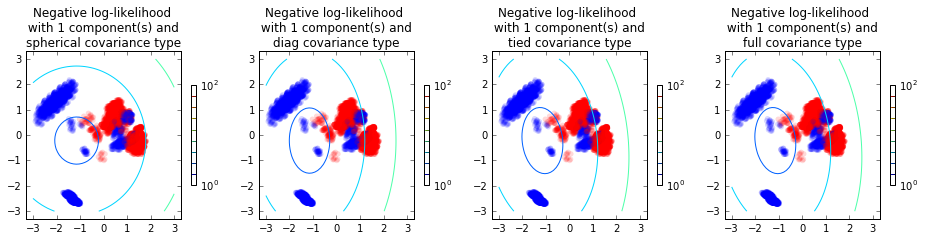

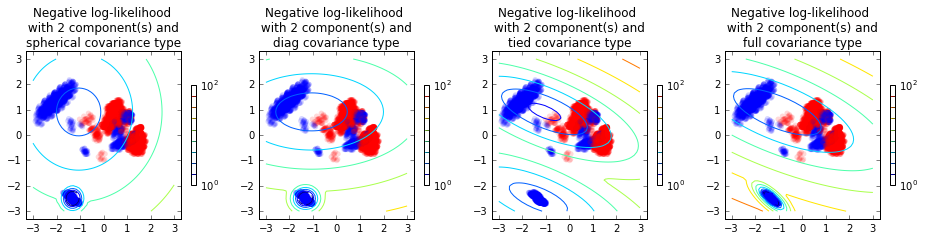

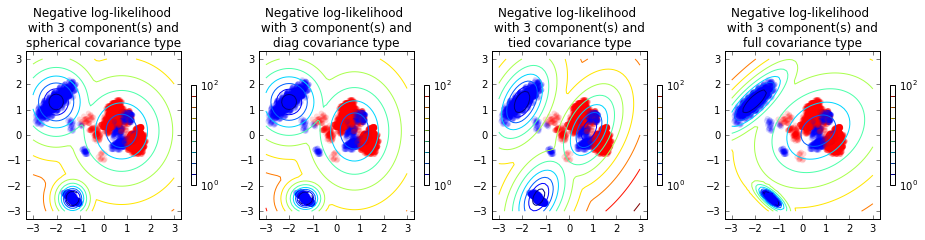

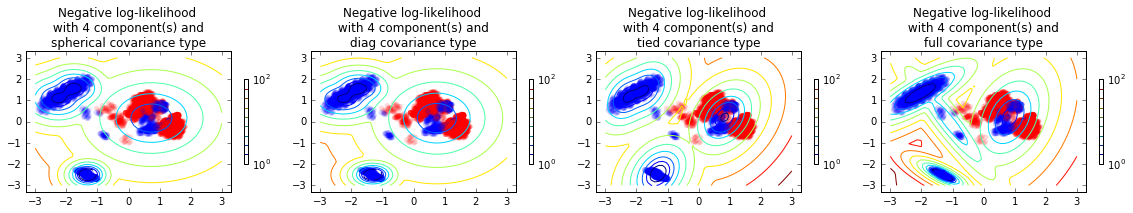

In [92]:
### STUDENT START ###
def P4(n_comp,pltnum):
    np.random.seed(1)
    # Fit a Gaussian Mixture Model with the parameters provided
    covar_type = ['spherical', 'diag', 'tied', 'full'] 
    plt.figure(figsize = (4*len(covar_type), 3))
    for j in range (0, len(covar_type)):
        #Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').
        clf = GMM(n_components=n_comp, covariance_type=covar_type[j])
        # Run the fit for the positive examples only
        clf.fit(X_train[train_labels==1]) 
        #np.round(g.weights_, 2)
                   
        #Plot the estimated density contours
        # This code is copied from the link provided with P4
        x = np.linspace(-3.0, 3.0)
        y = np.linspace(-3.0, 3.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)[0]
        Z = Z.reshape(X.shape)
        
        ax = plt.subplot(1, len(covar_type), j+1)

        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),levels=np.logspace(0, 2, 10))
        CB = plt.colorbar(CS, shrink=0.6, extend='both')
        colors = np.where(train_labels == 1, 'blue', 'red')
        plt.scatter(X_train[:,0], X_train[:,1], c = colors, alpha = 0.15, s = 30, edgecolor='')
        plt.title('Negative log-likelihood \n with {0} component(s) and \n{1} covariance type'.\
                      format(n_comp, covar_type[j]))
        


# Project the Mushroom data in two diemnsions
n_comp = 2
pca_mod = PCA(n_components = n_comp)
X_train = pca_mod.fit_transform(train_data)

# Vary the number of mixture components from 1-4
for i in range (0, 4):
    P4(i+1, ((i*4)+1))
    
plt.axis('tight')    
plt.tight_layout()
plt.show()
### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [93]:
#def P5():
### STUDENT START ###
np.random.seed(1)
# Project the Mushroom data in two diemnsions
n_comp = 2
pca_mod = PCA(n_components = n_comp)
X_train = pca_mod.fit_transform(train_data)
X_test = pca_mod.fit_transform(test_data)

# Fit a 4-component full covariance GMMs one for the positive examples
clf_pos = GMM(covariance_type='full', n_components=4)
clf_pos.fit(X_train[train_labels==1])

# Fit a 4-component full covariance GMMs one for the negative examples
clf_neg = GMM(covariance_type='full', n_components=4)
clf_neg.fit(X_train[train_labels==0]) 

# Predict the test examples
prob_pos = clf_pos.score(X_test)
prob_neg = clf_neg.score(X_test)

# Choose the label for which the model gives a larger probability 
test_prediction = np.where(prob_pos >= prob_neg, 1, 0)
print("Accuracy % is ", (metrics.accuracy_score(test_labels, test_prediction)*100))

### STUDENT END ###

#P5()

Accuracy % is  51.2455516014


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [94]:
#def P6():
### STUDENT START ###

def runGMMExperiment(pca_ncomp, gmm_ncomp, i):
    covar_type = ['spherical', 'diag', 'tied', 'full']
    pca_mod = PCA(n_components = pca_ncomp)
    X_train = pca_mod.fit_transform(train_data)
    X_test = pca_mod.fit_transform(test_data)

    for j in range(0,4):
        clf_pos = GMM(covariance_type=covar_type[j], n_components=gmm_ncomp)
        clf_pos.fit(X_train[train_labels==1])

        clf_neg = GMM(covariance_type=covar_type[j], n_components=gmm_ncomp)
        clf_neg.fit(X_train[train_labels==0]) 

        prob_pos = clf_pos.score(X_test)
        prob_neg = clf_neg.score(X_test)

        test_prediction = np.where(prob_pos >= prob_neg, 1, 0)
        accuracy[(i*4)+j][0] = pca_ncomp
        accuracy[(i*4)+j][1] = gmm_ncomp
        accuracy[(i*4)+j][2] = covar_type[j]
        accuracy[(i*4)+j][3] = np.round(metrics.accuracy_score(test_labels, test_prediction)*100, 2)
        
        #print("Parameters are ", pca_ncomp, gmm_ncomp, covar_type[j])
        #print("Accuracy % is ", (metrics.accuracy_score(test_labels, test_prediction)*100))

# Based on the formula provided in P6, calculate the values of PCA_ncomp and GMM_ncomp that leads to 50 components        
PCA_ncomp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
GMM_ncomp = [5,4,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
covar_type = ['spherical', 'diag', 'tied', 'full']
# Initialize the accuracy list that will be used to store the parameters and the accuracy
row = len(PCA_ncomp)*4
col = 4
accuracy = [[0 for x in range(col)] for y in range(row)] 

# Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters
for i in range(0, len(PCA_ncomp)):
    runGMMExperiment(PCA_ncomp[i], GMM_ncomp[i], i)

# Sort the accuracy list based on accuracy the x[3] column in the list
accuracy = sorted(accuracy,key=lambda x: x[3])
header1 = ["PCA N Comp", "GMM N Comp", "Covar Type", "Accuracy %"]
row_format ="{:>15}" * (len(header1))
print("\n")
print("============================= GMM Experiment - Accuracy ============================= ")
print(row_format.format(*header1))
for row in accuracy:
    print(row_format.format(*row))

### STUDENT END ###

#P6()



============================= GMM Experiment - Accuracy ============================= 
     PCA N Comp     GMM N Comp     Covar Type     Accuracy %
              2              4           full          51.25
              4              2      spherical          56.05
              3              3           diag          56.14
              8              2      spherical          56.76
              6              2      spherical          57.12
              7              2      spherical          57.38
              5              2      spherical          57.47
              2              4           tied          60.32
              3              3      spherical          60.59
              3              3           tied          61.12
              9              1      spherical          62.63
             10              1      spherical          62.99
             23              1      spherical          62.99
             24              1      spherical          62